<a href="https://colab.research.google.com/github/abkerper/DS4002_Project2/blob/main/SCRIPTS/Scripts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/abkerper/DS4002_Project2

fatal: destination path 'DS4002_Project2' already exists and is not an empty directory.


In [2]:
!pip install pmdarima

In [3]:
import numpy as np
import pandas as pd
import datetime
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
df_type = pd.read_csv('/content/DS4002_Project2/DATA/SA_0000001400.csv')

In [5]:
df_type = df_type[['Id','IndicatorCode', 'SpatialDimension','SpatialDimensionValueCode',
                     'DisaggregatingDimension1', 'DisaggregatingDimension1ValueCode',
                     'NumericValue','TimeDimensionValue']]

In [6]:
df_type = df_type[df_type['SpatialDimension']=='COUNTRY']

In [7]:
df_total = df_type[(df_type['DisaggregatingDimension1ValueCode']=='ALCOHOLTYPE_SA_TOTAL')]

In [8]:
df_total = df_total[['SpatialDimensionValueCode','NumericValue','TimeDimensionValue']]

In [9]:
countries = ['AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST','FIN','FRA','DEU','GRC','HUN','IRL','ITA',
             'LVA','LTU','LUX','MLT','NLD','POL','PRT','ROU','SVK','SVN','ESP','SWE','GBR','USA','JPN']

df_total = df_total[df_total['SpatialDimensionValueCode'].isin(countries)]

In [10]:
df_pivot = df_total.pivot(index='TimeDimensionValue', columns='SpatialDimensionValueCode', values='NumericValue')

df_pivot.reset_index(inplace=True)

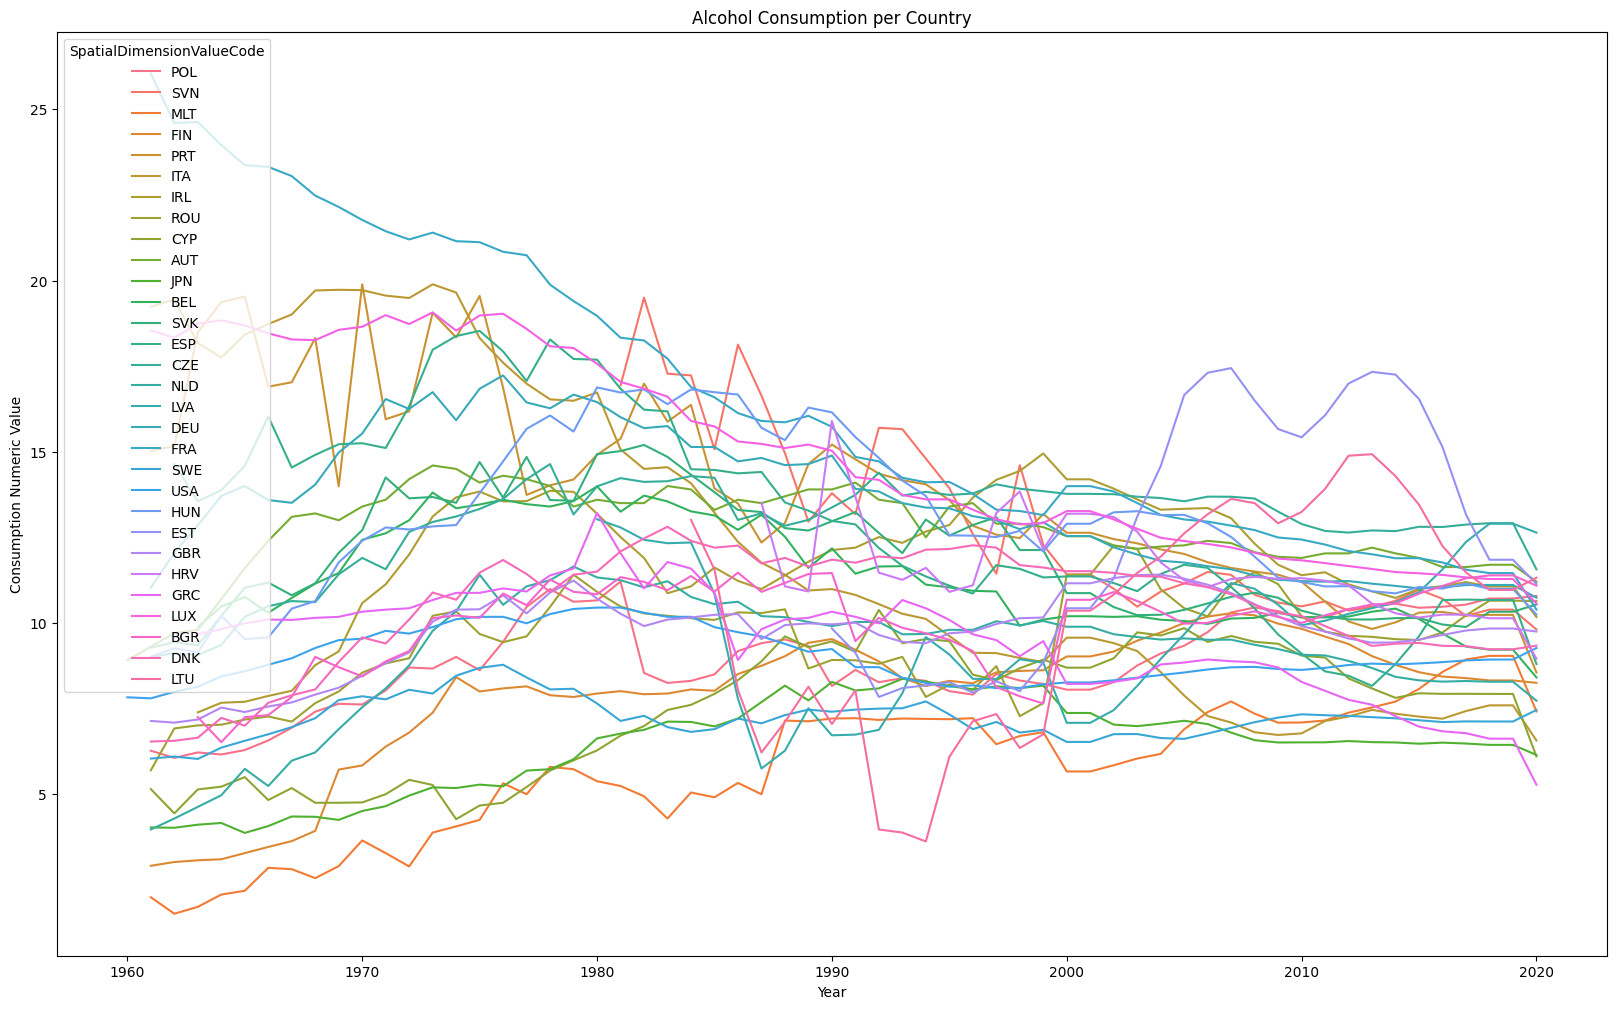

In [11]:
plt.figure(figsize=(20, 12))

sns.lineplot(data=df_total, x = 'TimeDimensionValue', y = 'NumericValue', hue = 'SpatialDimensionValueCode')

plt.title('Alcohol Consumption per Country')
plt.xlabel('Year')
plt.ylabel('Consumption Numeric Value')

plt.show()

In [12]:
USA = df_pivot[['TimeDimensionValue','USA']]
JPN = df_pivot[['TimeDimensionValue','JPN']]
GBR = df_pivot[['TimeDimensionValue','GBR']]
DEU = df_pivot[['TimeDimensionValue','DEU']]

In [13]:
USA.rename(columns={'USA': 'ConsumptionValue'}, inplace=True)
USA.set_index('TimeDimensionValue', inplace=True)
USA = USA.reset_index(drop=False) # Keep the 'TimeDimensionValue' column
USA.index = pd.to_datetime(USA['TimeDimensionValue'], format='%Y')
USA = USA.drop(columns=['TimeDimensionValue'])

<ipython-input-13-65b61869d716>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA.rename(columns={'USA': 'ConsumptionValue'}, inplace=True)


In [14]:
JPN.rename(columns={'JPN': 'ConsumptionValue'}, inplace=True)
JPN.set_index('TimeDimensionValue', inplace=True)
JPN = JPN.reset_index(drop=False) # Keep the 'TimeDimensionValue' column
JPN.index = pd.to_datetime(JPN['TimeDimensionValue'], format='%Y')
JPN = JPN.drop(columns=['TimeDimensionValue'])

<ipython-input-14-df84da04a973>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JPN.rename(columns={'JPN': 'ConsumptionValue'}, inplace=True)


In [15]:
GBR.rename(columns={'GBR': 'ConsumptionValue'}, inplace=True)
GBR.set_index('TimeDimensionValue', inplace=True)
GBR = GBR.reset_index(drop=False) # Keep the 'TimeDimensionValue' column
GBR.index = pd.to_datetime(GBR['TimeDimensionValue'], format='%Y')
GBR = GBR.drop(columns=['TimeDimensionValue'])

<ipython-input-15-4246035211c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GBR.rename(columns={'GBR': 'ConsumptionValue'}, inplace=True)


In [16]:
DEU.rename(columns={'DEU': 'ConsumptionValue'}, inplace=True)
DEU.set_index('TimeDimensionValue', inplace=True)
DEU = DEU.reset_index(drop=False) # Keep the 'TimeDimensionValue' column
DEU.index = pd.to_datetime(DEU['TimeDimensionValue'], format='%Y')
DEU = DEU.drop(columns=['TimeDimensionValue'])

<ipython-input-16-358a1ce0675f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DEU.rename(columns={'DEU': 'ConsumptionValue'}, inplace=True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In 2008, the actual value was 8.71812, forecasted was 8.71534, spike: 0.00278


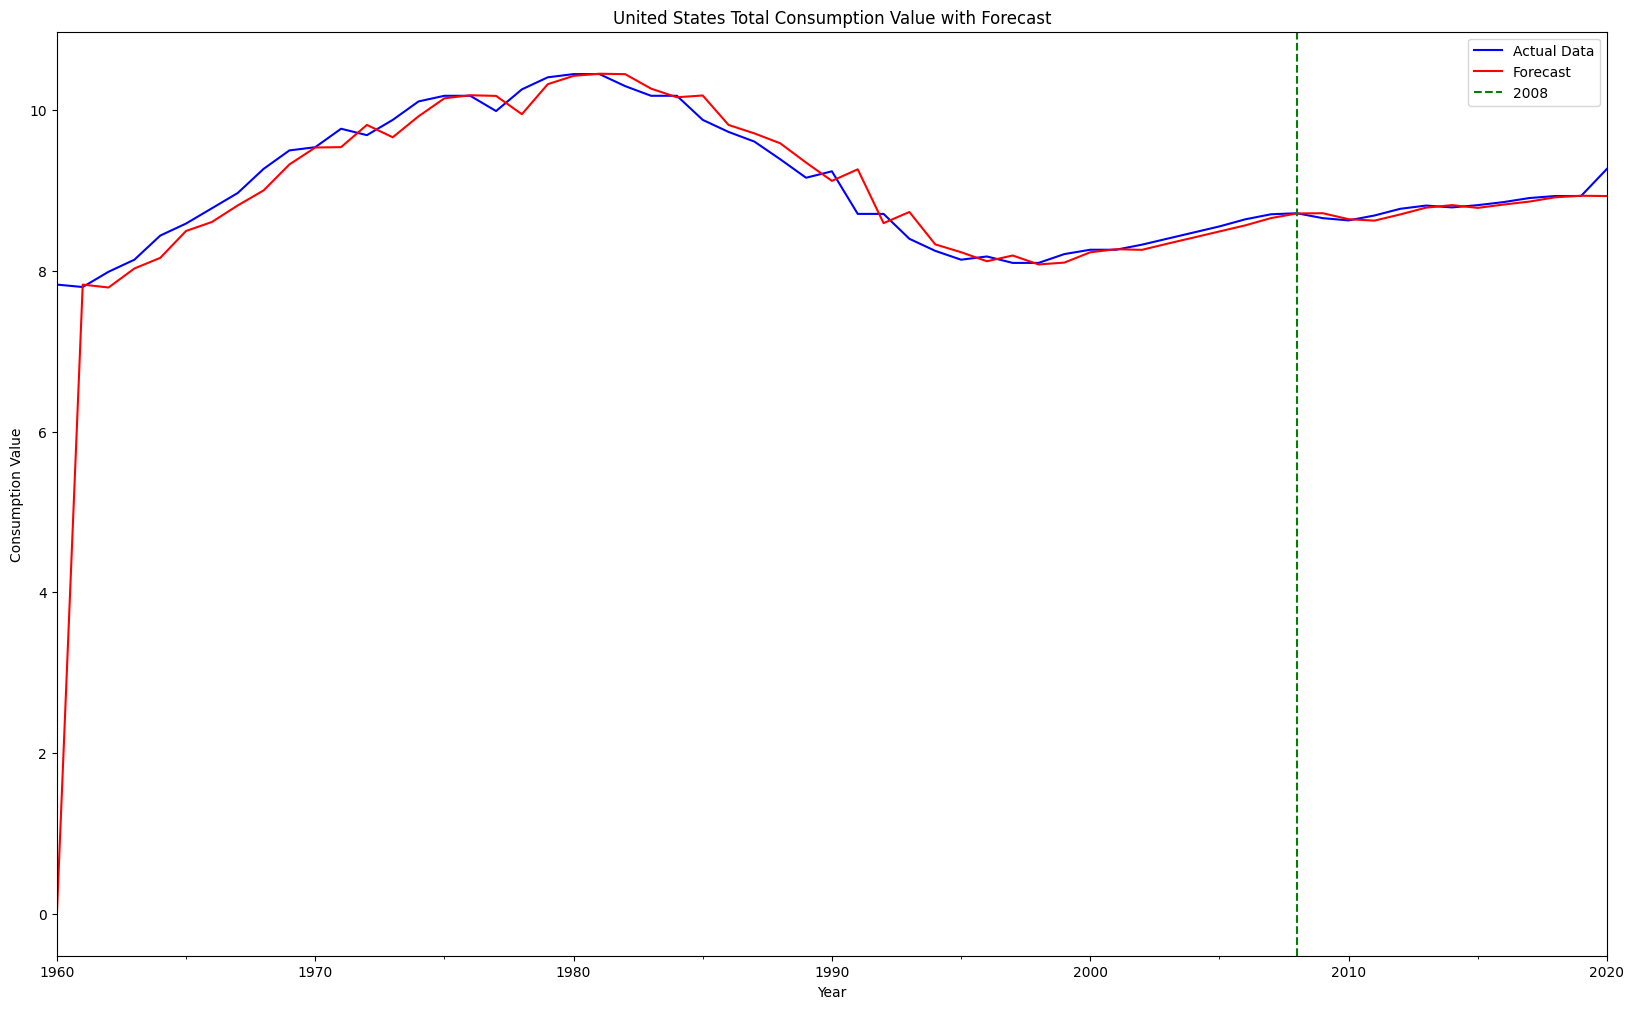

In [17]:
model = SARIMAX(USA['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

# Step 3: Generate predictions for the entire series
USA['Forecast'] = result.predict(start=USA.index[0], end=USA.index[-1])

# Step 4: Calculate spikes for specific years
year = 2008
actual_value = USA.loc[pd.to_datetime(str(year))]['ConsumptionValue']
forecasted_value = USA.loc[pd.to_datetime(str(year))]['Forecast']

spike = actual_value - forecasted_value
if spike > 0:
    print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
else:
    print(f"In {year}, no spike detected.")

# Step 5: Plotting the actual vs forecast
plt.figure(figsize=(20, 12))
USA['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
USA['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('United States Total Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')

plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='2008')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In 2008, no spike detected.


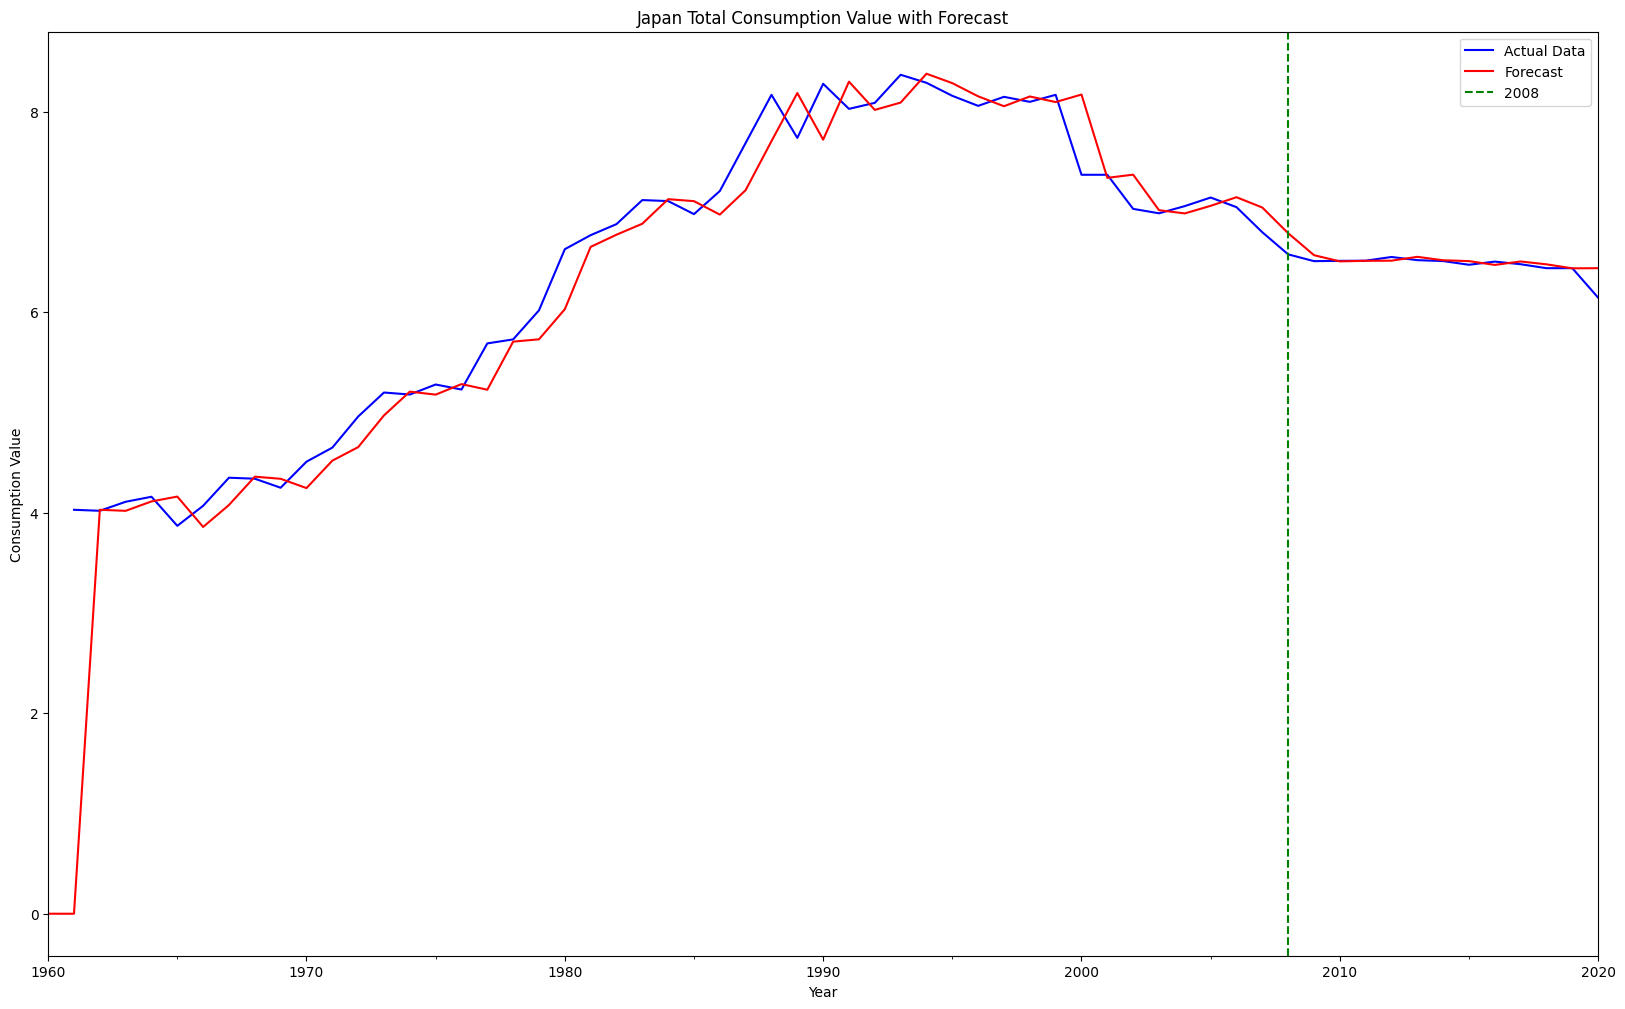

In [18]:
model = SARIMAX(JPN['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

JPN['Forecast'] = result.predict(start=JPN.index[0], end=JPN.index[-1])

year = 2008
actual_value = JPN.loc[pd.to_datetime(str(year))]['ConsumptionValue']
forecasted_value = JPN.loc[pd.to_datetime(str(year))]['Forecast']
spike = actual_value - forecasted_value

if spike > 0:
    print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
else:
    print(f"In {year}, no spike detected.")

# Step 5: Plotting the actual vs forecast
plt.figure(figsize=(20, 12))
JPN['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
JPN['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('Japan Total Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')
plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='2008')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In 2008, no spike detected.


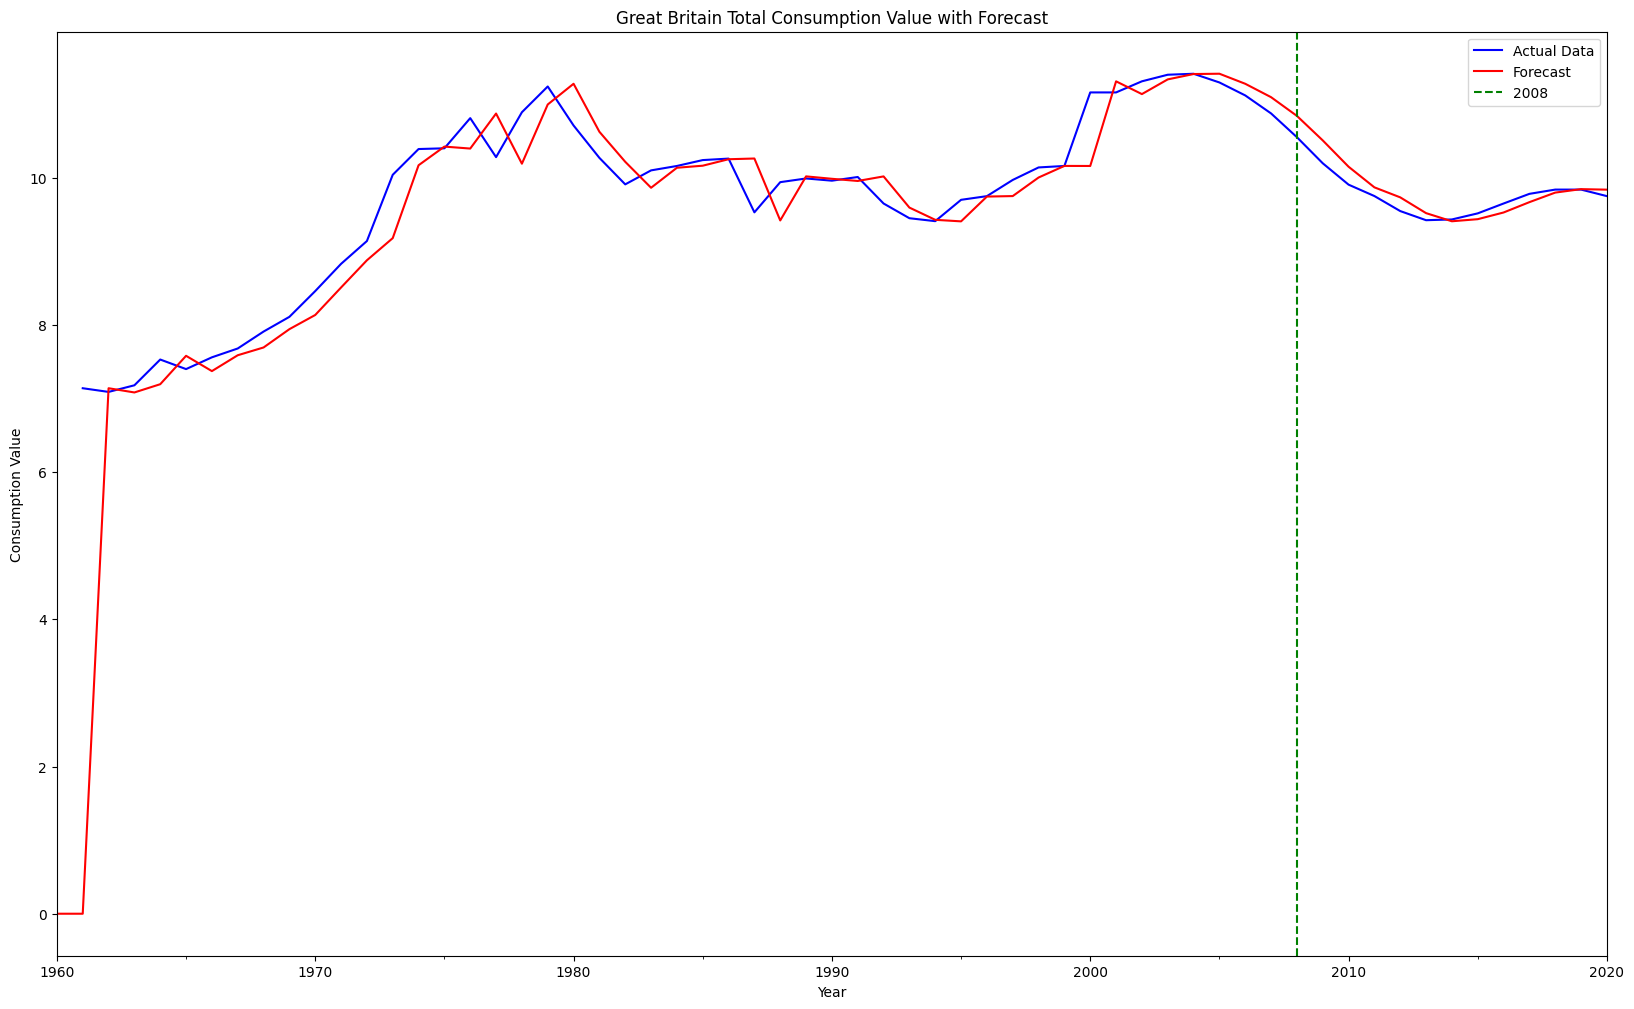

In [19]:
model = SARIMAX(GBR['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

GBR['Forecast'] = result.predict(start=GBR.index[0], end=GBR.index[-1])

year = 2008

actual_value = GBR.loc[pd.to_datetime(str(year))]['ConsumptionValue']
forecasted_value = GBR.loc[pd.to_datetime(str(year))]['Forecast']
spike = actual_value - forecasted_value

if spike > 0:
    print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
else:
    print(f"In {year}, no spike detected.")

# Step 5: Plotting the actual vs forecast
plt.figure(figsize=(20, 12))
GBR['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
GBR['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('Great Britain Total Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')
plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='2008')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In 2008, no spike detected.


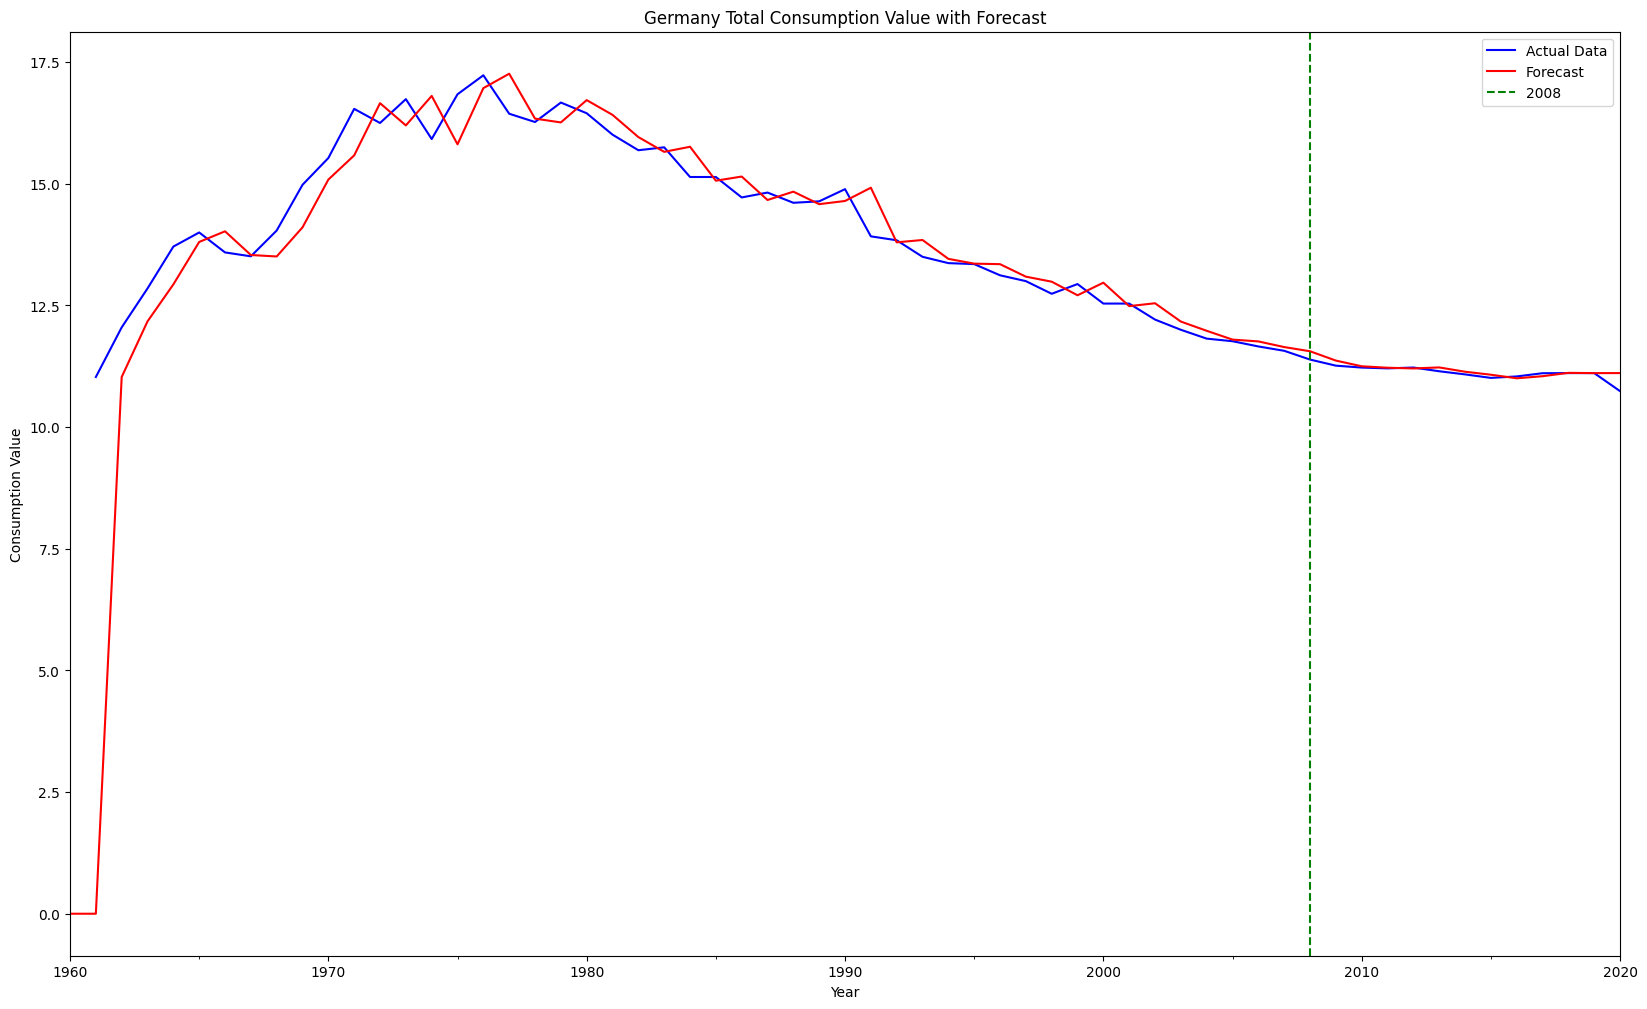

In [20]:
model = SARIMAX(DEU['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

DEU['Forecast'] = result.predict(start=DEU.index[0], end=DEU.index[-1])

year = 2008

actual_value = DEU.loc[pd.to_datetime(str(year))]['ConsumptionValue']
forecasted_value = DEU.loc[pd.to_datetime(str(year))]['Forecast']
spike = actual_value - forecasted_value
if spike > 0:
    print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
else:
    print(f"In {year}, no spike detected.")

# Step 5: Plotting the actual vs forecast
plt.figure(figsize=(20, 12))
DEU['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
DEU['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('Germany Total Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')
plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='2008')
plt.legend()
plt.show()

In [21]:
df_type = df_type[(df_type['SpatialDimensionValueCode']=='USA')]
df_type_total = df_type[['DisaggregatingDimension1ValueCode','NumericValue','TimeDimensionValue']]

df_pivot2 = df_type_total.pivot(index='TimeDimensionValue', columns='DisaggregatingDimension1ValueCode', values='NumericValue')

df_pivot2.reset_index(inplace=True)

In [22]:
beer = df_pivot2[['TimeDimensionValue','ALCOHOLTYPE_SA_BEER']]
spirits = df_pivot2[['TimeDimensionValue','ALCOHOLTYPE_SA_SPIRITS']]
wine = df_pivot2[['TimeDimensionValue','ALCOHOLTYPE_SA_WINE']]

In [23]:
beer.rename(columns={'ALCOHOLTYPE_SA_BEER': 'ConsumptionValue'}, inplace=True)

beer.set_index('TimeDimensionValue', inplace=True)
beer = beer.reset_index(drop=False)

beer.index = pd.to_datetime(beer['TimeDimensionValue'], format='%Y')
beer = beer.drop(columns=['TimeDimensionValue'])

<ipython-input-23-9615ec01bd71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer.rename(columns={'ALCOHOLTYPE_SA_BEER': 'ConsumptionValue'}, inplace=True)


In [24]:
spirits.rename(columns={'ALCOHOLTYPE_SA_SPIRITS': 'ConsumptionValue'}, inplace=True)

spirits.set_index('TimeDimensionValue', inplace=True)
spirits = spirits.reset_index(drop=False)

spirits.index = pd.to_datetime(spirits['TimeDimensionValue'], format='%Y')
spirits = spirits.drop(columns=['TimeDimensionValue'])

<ipython-input-24-ac564d9f443f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spirits.rename(columns={'ALCOHOLTYPE_SA_SPIRITS': 'ConsumptionValue'}, inplace=True)


In [25]:
wine.rename(columns={'ALCOHOLTYPE_SA_WINE': 'ConsumptionValue'}, inplace=True)

wine.set_index('TimeDimensionValue', inplace=True)
wine = wine.reset_index(drop=False)

wine.index = pd.to_datetime(wine['TimeDimensionValue'], format='%Y')
wine = wine.drop(columns=['TimeDimensionValue'])

<ipython-input-25-baf829b5ada2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine.rename(columns={'ALCOHOLTYPE_SA_WINE': 'ConsumptionValue'}, inplace=True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In 2008, no spike detected.


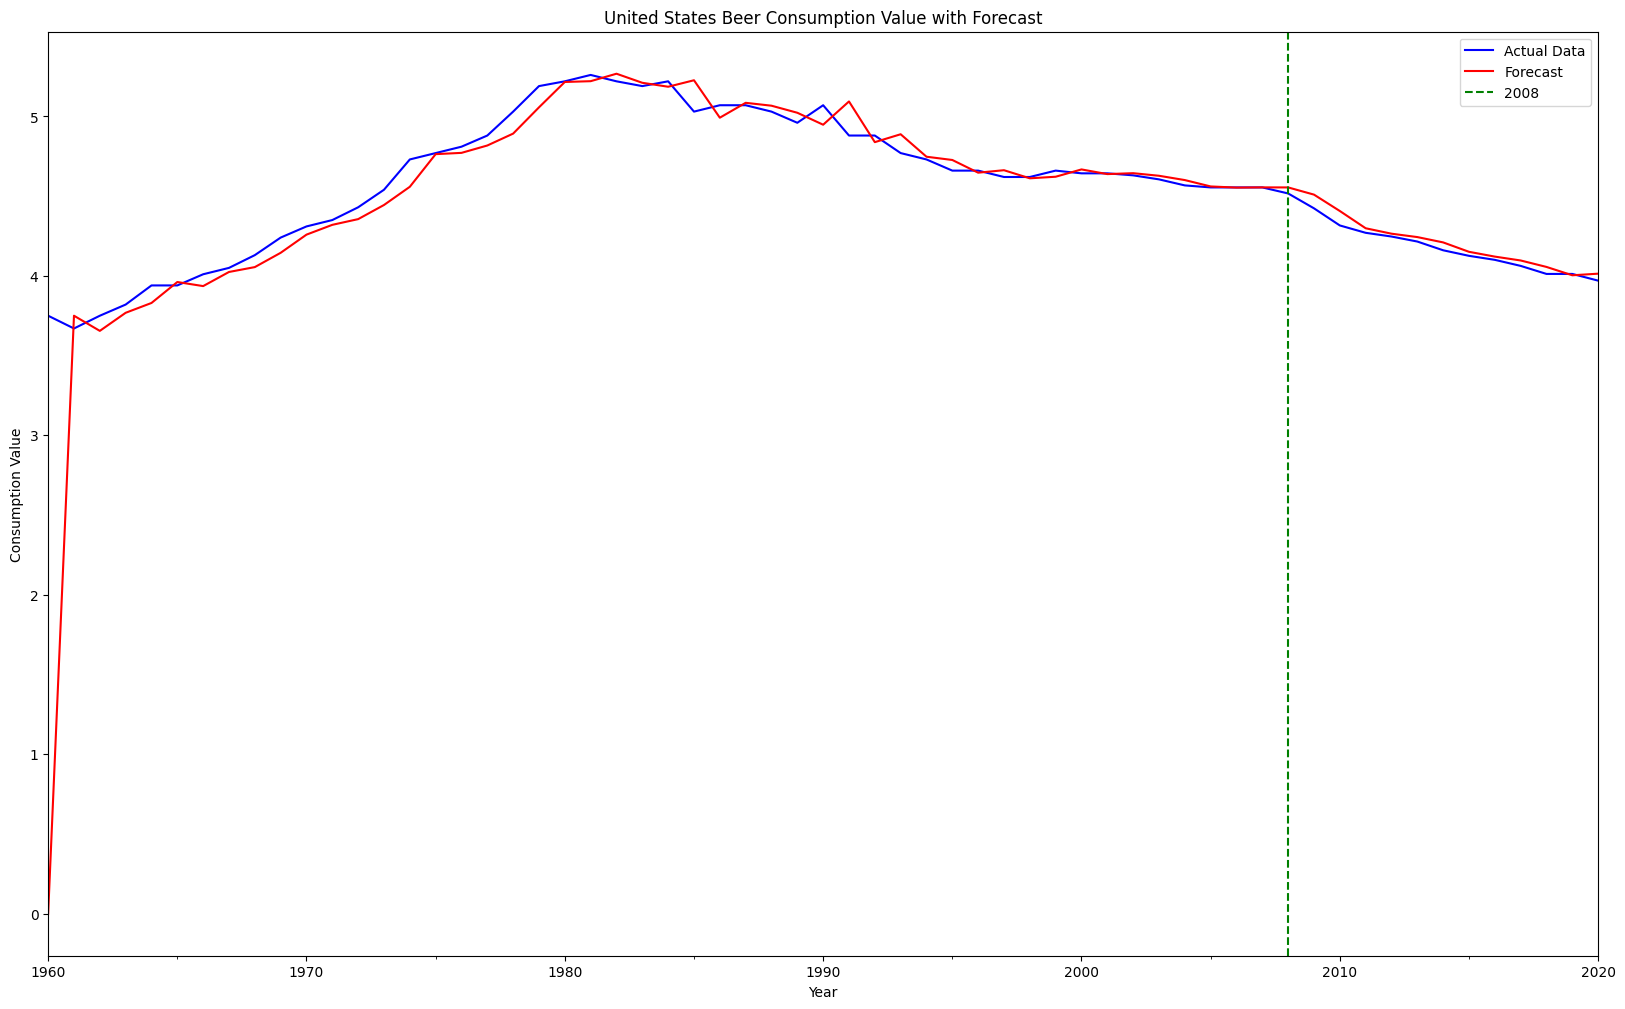

In [26]:
model = SARIMAX(beer['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

beer['Forecast'] = result.predict(start=beer.index[0], end=beer.index[-1])

year = 2008

actual_value = beer.loc[pd.to_datetime(str(year))]['ConsumptionValue']
forecasted_value = beer.loc[pd.to_datetime(str(year))]['Forecast']
spike = actual_value - forecasted_value

if spike > 0:
    print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
else:
    print(f"In {year}, no spike detected.")


plt.figure(figsize=(20, 12))
beer['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
beer['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('United States Beer Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')
plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='2008')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In 2008, the actual value was 2.75043, forecasted was 2.73336, spike: 0.01707


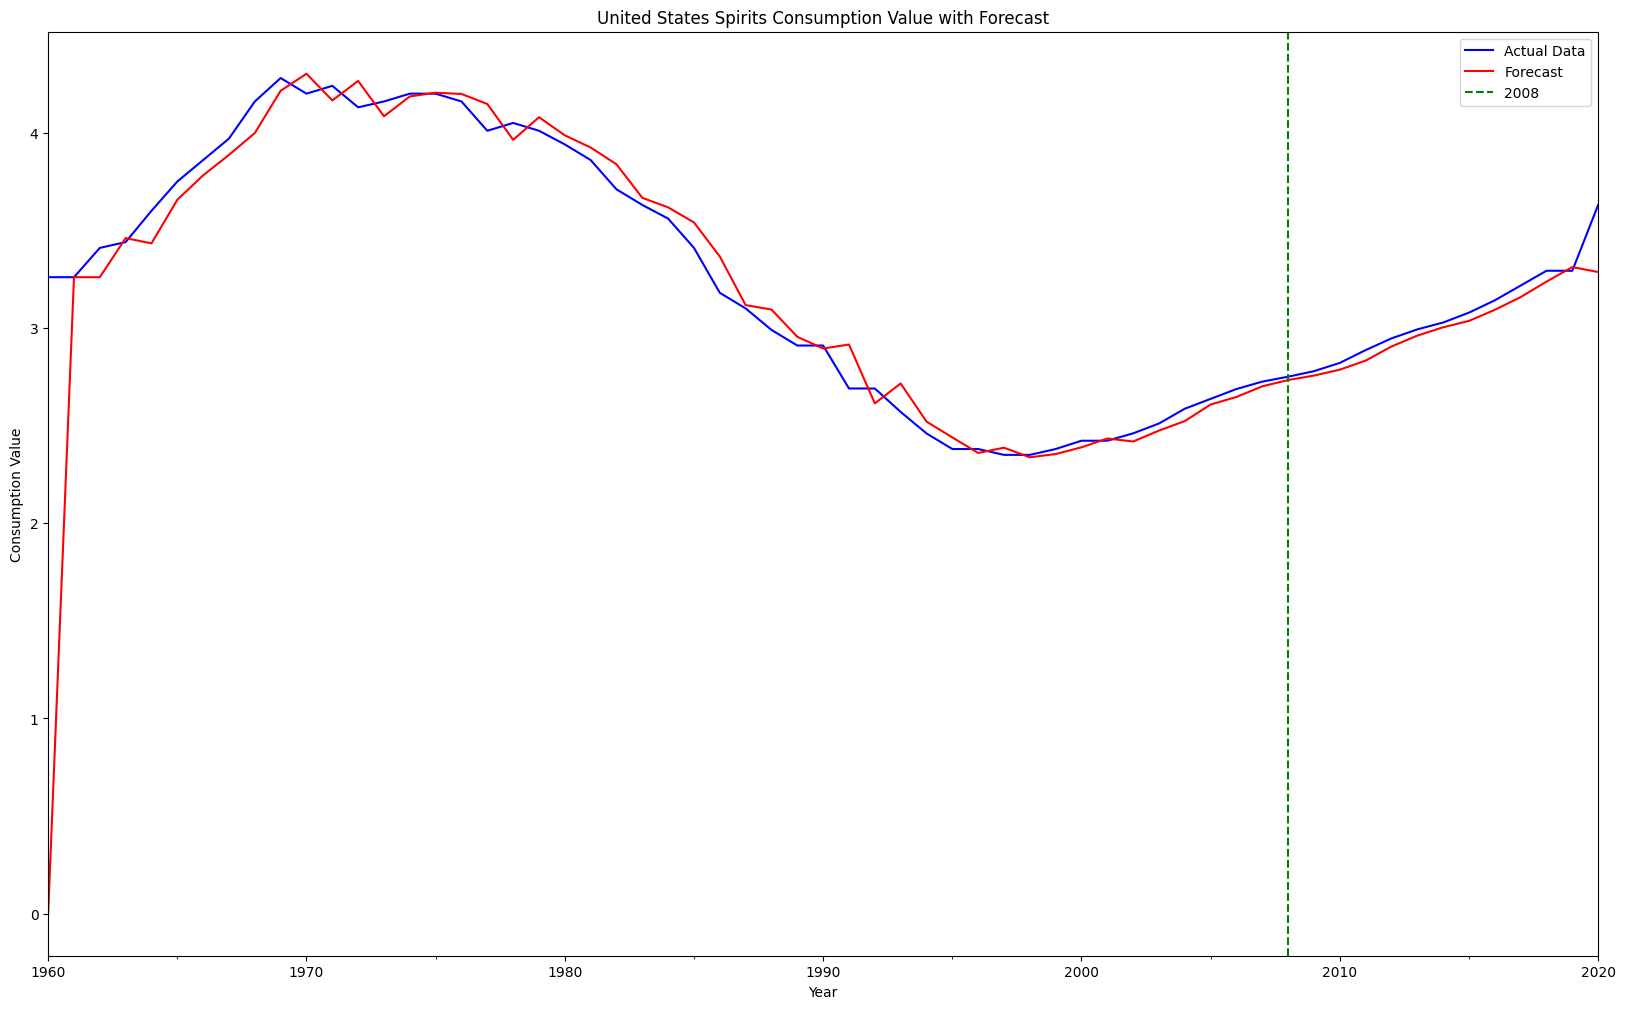

In [27]:
model = SARIMAX(spirits['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

spirits['Forecast'] = result.predict(start=spirits.index[0], end=spirits.index[-1])

year = 2008

actual_value = spirits.loc[pd.to_datetime(str(year))]['ConsumptionValue']
forecasted_value = spirits.loc[pd.to_datetime(str(year))]['Forecast']
spike = actual_value - forecasted_value
if spike > 0:
    print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
else:
    print(f"In {year}, no spike detected.")

plt.figure(figsize=(20, 12))
spirits['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
spirits['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('United States Spirits Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')
plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='2008')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In 2008, the actual value was 1.45092, forecasted was 1.42946, spike: 0.02146


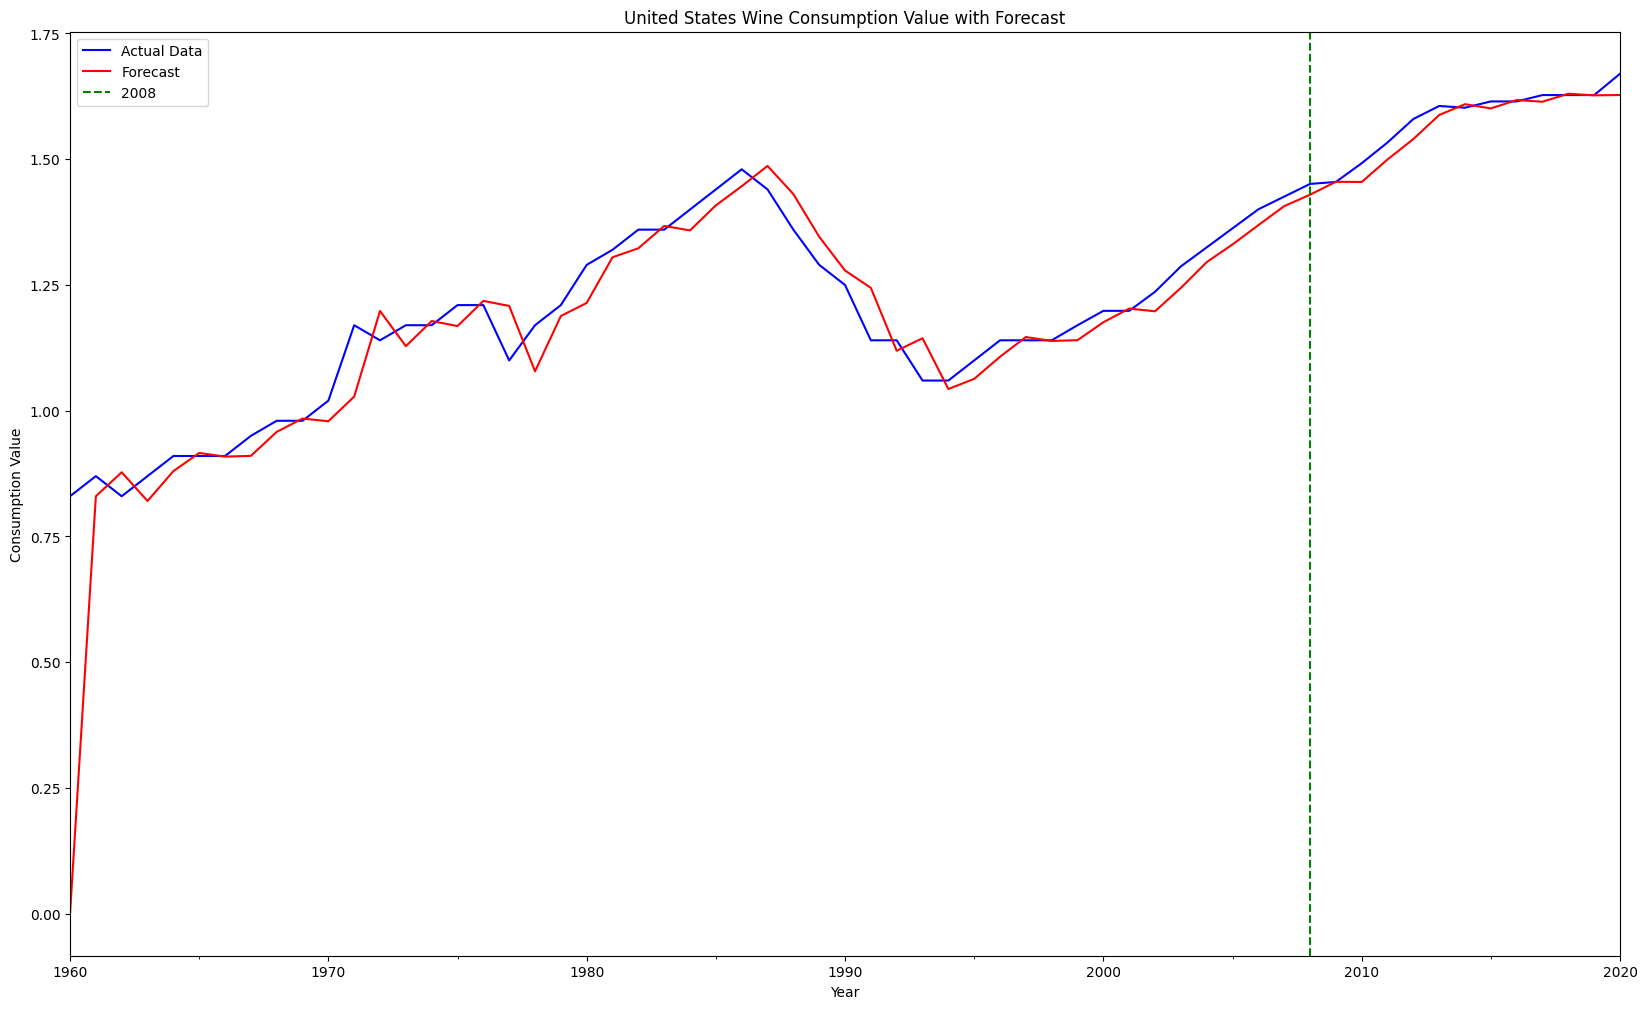

In [28]:
model = SARIMAX(wine['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

wine['Forecast'] = result.predict(start=wine.index[0], end=wine.index[-1])

year = 2008

actual_value = wine.loc[pd.to_datetime(str(year))]['ConsumptionValue']
forecasted_value = wine.loc[pd.to_datetime(str(year))]['Forecast']
spike = actual_value - forecasted_value
if spike > 0:
    print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
else:
    print(f"In {year}, no spike detected.")

plt.figure(figsize=(20, 12))
wine['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
wine['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('United States Wine Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')
plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='2008')
plt.legend()
plt.show()